In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
breast = load_breast_cancer()
target = breast.target
data = breast.data

The training split below is used as an example for displaying decision trees and confusion matrices

In [4]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=0)

# Decision Tree without improvements

In [34]:
clf = tree.DecisionTreeClassifier(criterion="entropy") # Create decision tree model.
clf = clf.fit(data_train, target_train) # Train model on training data.

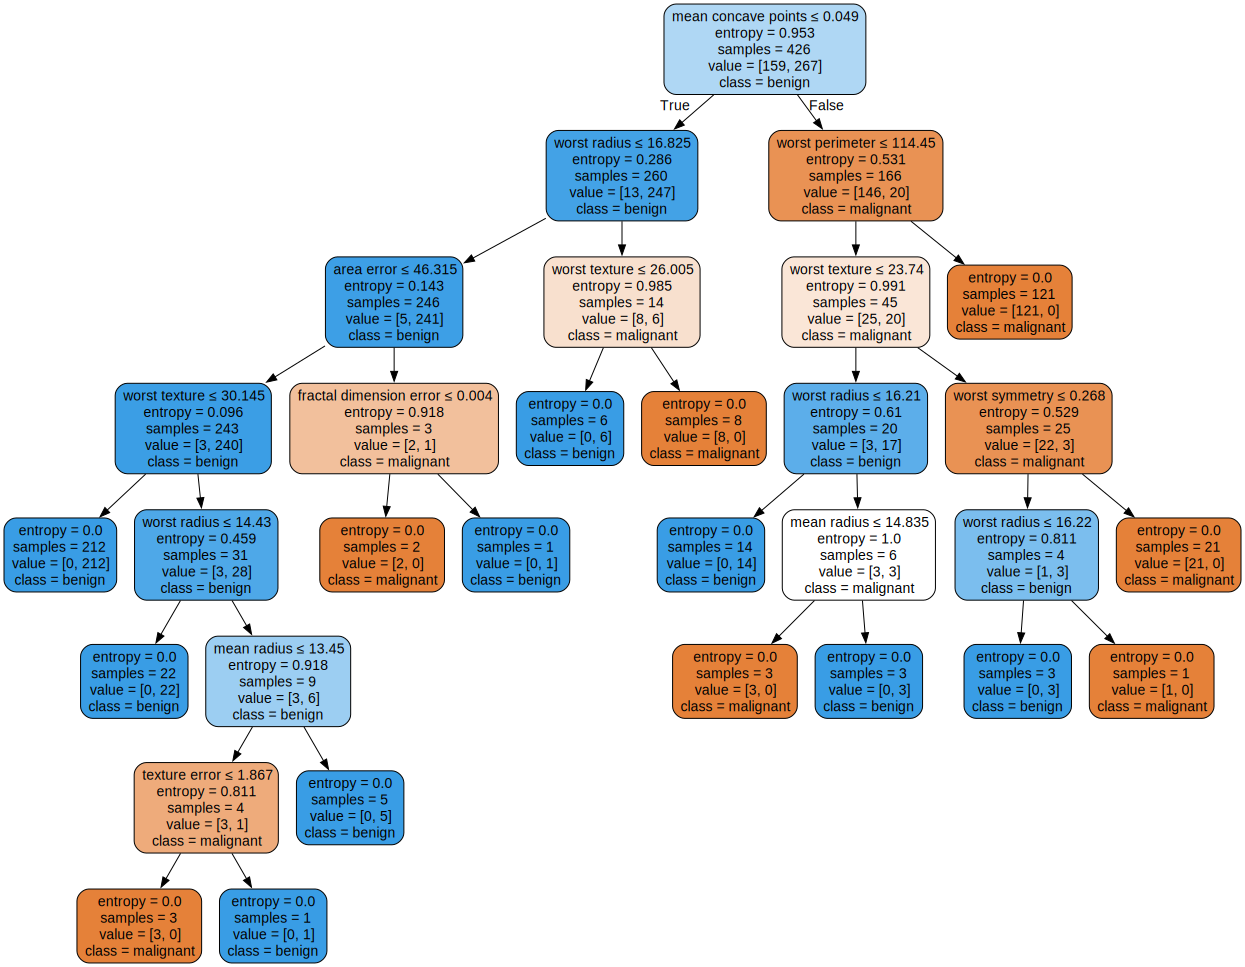

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=breast.feature_names, class_names=breast.target_names, filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

To measure accuracy we use 10-fold cross-validation to make sure we don't overfit to the test data

In [36]:
acc = str(100*np.mean(cross_val_score(clf, data, target, cv=10)))[0:5]
print("Accuracy (average of 10-cross-validation): ", acc,"%",sep="")

Accuracy (average of 10-cross-validation): 93.13%


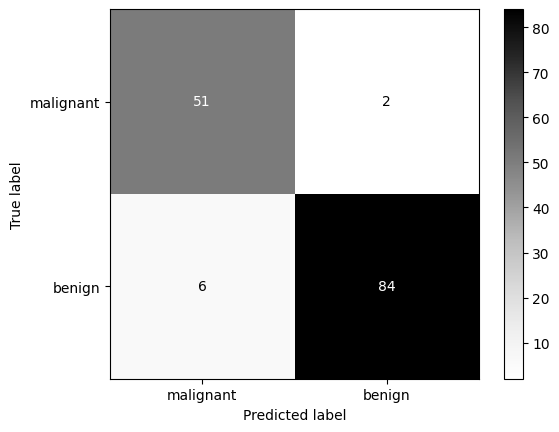

In [37]:
tree_CMD = ConfusionMatrixDisplay.from_estimator(clf, data_test, target_test, cmap="Greys", display_labels=breast.target_names)

The above confusion matrix is from the example with a 25%/75% test/training split.

# Attempting to improve accuracy
The code below is similar to above but with some tweaks to data and training scheme. One improvement is to reduce the maximum depth of the tree. I'm unsure of exactly how it is done but the effect might be the same as pruning. Reducing the depth reduces the tendency of decision trees to overfit.

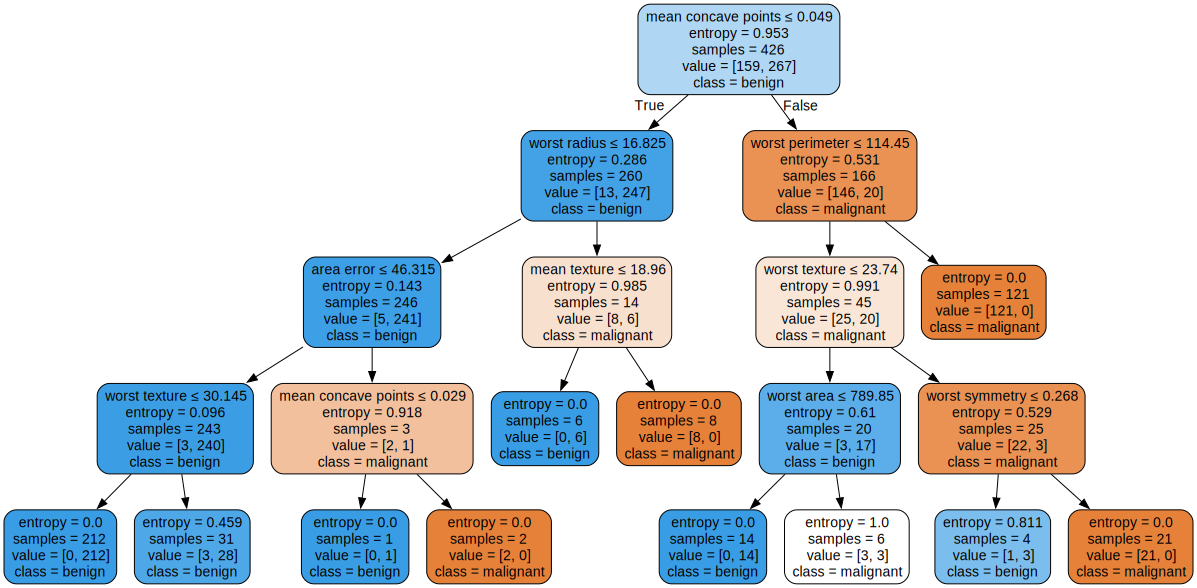

In [92]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
clf2 = clf2.fit(data_train, target_train)
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=breast.feature_names, class_names=breast.target_names,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [93]:
acc2 = str(100*np.mean(cross_val_score(clf2, data, target, cv=10)))[0:5] # Computes accuracy as mean of all cross-validation scores and converts to string

Accuracy (average of 10-cross-validation): 94.55%


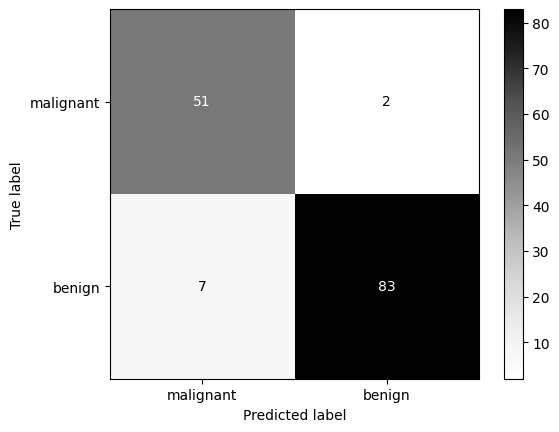

In [94]:
print("Accuracy (average of 10-cross-validation): ", acc2, "%", sep="")
tree_CM2 = ConfusionMatrixDisplay.from_estimator(clf2, data_test, target_test, cmap="Greys", display_labels=breast.target_names)

The above confusion matrix is from the example with a 25%/75% test/training split.


# Naive Bayes

Accuracy (average of 10-cross-validation): 93.67%


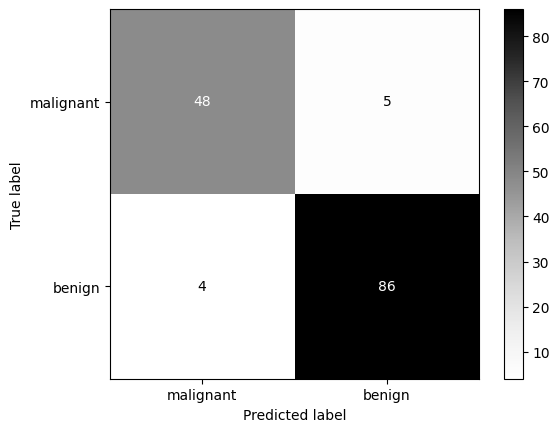

In [55]:
gnb = GaussianNB() # Create Naive Bayes model.
gnb = gnb.fit(data_train, target_train) # Fit to training data
acc_gnb = str(100 * np.mean(cross_val_score(gnb, data, target, cv=10)))[0:5]  # Computes accuracy as mean of all cross-validation scores and converts to string
print("Accuracy (average of 10-cross-validation): ", acc_gnb, "%", sep="")
gnb_CM = ConfusionMatrixDisplay.from_estimator(gnb, data_test, target_test, cmap="Greys", display_labels=breast.target_names)

The above confusion matrix is from the example with a 25%/75% test/training split.

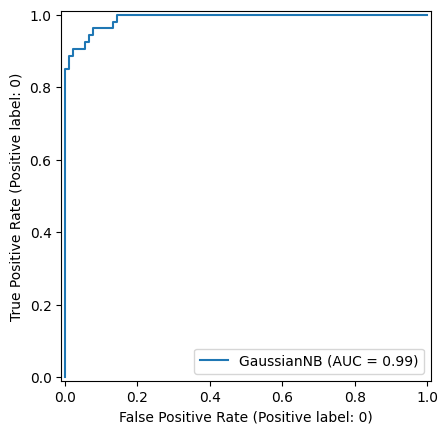

In [50]:
gnb_roc = RocCurveDisplay.from_estimator(gnb, data_test, target_test, pos_label=0)

The ROC-curve above
# Discussion
If we consider malignant to be the "positive" outcome, then the decision tree model skews toward false positives while the naive bayes seem to have similar rates for both false negative and false positive. Although this is just for a single training split. Overall the accuracy is very similar. Which one you prefer then would come down to the if you prefer more or less false positives. A false positive would mean that a benign tumor would be classified as malignant which in turn would probably cause the patient to undergo treatment unnecessarily. Probably costly treatment in terms of money and health since we know that chemotherapy and such is quite bad, but the patient would probably survive. On the other hand, if a malignant tumor is classified as benign (false negative) then the patient will probably die and the trust in healthcare might decrease. If we value human life above all else then a false negative is clearly the more costly one. As such, the decision tree algorithm is preferable.

The pruning